temp_0.vl.json
__temp__/temp_0.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'url': 'data/unemployment-across-industries.json'},
 'encoding': {'x': {'axis': {'format': '%Y'},
                    'field': 'series',
                    'timeUnit': 'yearmonth',
                    'type': 'temporal'},
              'y': {'aggregate': 'sum',
                    'axis': {'title': 'count'},
                    'field': 'count',
                    'type': 'quantitative'}},
 'height': 200,
 'mark': 'point',
 'width': 300}
__temp__/data/unemployment-across-industries.json


temp_1.vl.json
__temp__/temp_1.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'url': 'data/unemployment-across-industries.json'},
 'encoding': {'x': {'axis': {'format': '%Y'},
                    'field': 'series',
                    'timeUnit': 'yearmonth',
                    'type': 'temporal'},
              'y': {'aggregate': 'sum',
                    'axis': {'title': 'count'},
                    'field': 'count',
                    'type': 'quantitative'}},
 'height': 200,
 'mark': 'bar',
 'width': 300}
__temp__/data/unemployment-across-industries.json


temp_10.vl.json
__temp__/temp_10.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'url': 'data/unemployment-across-industries.json'},
 'encoding': {'x': {'aggregate': 'min',
                    'axis': {'format': '%Y'},
                    'field': 'series',
                    'timeUnit': 'yearmonth',
                    'type': 'temporal'},
              'y': {'aggregate': 'sum',
                    'axis': {'title': 'count'},
                    'field': 'count',
                    'type': 'quantitative'}},
 'height': 200,
 'mark': 'area',
 'width': 300}
__temp__/data/unemployment-across-industries.json


temp_100.vl.json
__temp__/temp_100.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'url': 'data/unemployment-across-industries.json'},
 'encoding': {'x': {'bin': {'maxbins': 10},
                    'field': 'series',
                    'type': 'ordinal'},
              'y': {'aggregate': 'count',
                    'field': 'count',
                    'type': 'quantitative'}},
 'mark': {'binSpacing': 0, 'type': 'bar'}}
__temp__/data/unemployment-across-industries.json


temp_101.vl.json
__temp__/temp_101.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'url': 'data/unemployment-across-industries.json'},
 'encoding': {'x': {'bin': {'maxbins': 10},
                    'field': 'series',
                    'type': 'nominal'},
              'y': {'aggregate': 'count',
                    'field': 'count',
                    'type': 'quantitative'}},
 'mark': {'binSpacing': 0, 'type': 'bar'}}
__temp__/data/unemployment-across-industries.json


temp_102.vl.json
__temp__/temp_102.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'url': 'data/unemployment-across-industries.json'},
 'encoding': {'x': {'bin': {'maxbins': 10},
                    'field': 'series',
                    'type': 'temporal'},
              'y': {'aggregate': 'count',
                    'field': 'count',
                    'type': 'quantitative'}},
 'mark': {'binSpacing': 0, 'type': 'bar'}}
__temp__/data/unemployment-across-industries.json


temp_103.vl.json
__temp__/temp_103.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'url': 'data/unemployment-across-industries.json'},
 'encoding': {'x': {'bin': {'maxbins': 10},
                    'field': 'series',
                    'type': 'quantitative'},
              'y': {'aggregate': 'count', 'field': 'count', 'type': 'ordinal'}},
 'mark': {'binSpacing': 0, 'type': 'bar'}}
__temp__/data/unemployment-across-industries.json


temp_104.vl.json
__temp__/temp_104.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'url': 'data/unemployment-across-industries.json'},
 'encoding': {'x': {'bin': {'maxbins': 10},
                    'field': 'series',
                    'type': 'quantitative'},
              'y': {'aggregate': 'count', 'field': 'count', 'type': 'nominal'}},
 'mark': {'binSpacing': 0, 'type': 'bar'}}
__temp__/data/unemployment-across-industries.json


temp_105.vl.json
__temp__/temp_105.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'url': 'data/unemployment-across-industries.json'},
 'encoding': {'x': {'bin': {'maxbins': 10},
                    'field': 'series',
                    'type': 'quantitative'},
              'y': {'aggregate': 'count',
                    'field': 'count',
                    'type': 'temporal'}},
 'mark': {'binSpacing': 0, 'type': 'bar'}}
__temp__/data/unemployment-across-industries.json


temp_106.vl.json
__temp__/temp_106.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'url': 'data/unemployment-across-industries.json'},
 'encoding': {'x': {'aggregate': 'count',
                    'bin': {'maxbins': 10},
                    'field': 'series',
                    'type': 'quantitative'},
              'y': {'aggregate': 'count',
                    'field': 'count',
                    'type': 'quantitative'}},
 'mark': {'binSpacing': 0, 'type': 'bar'}}
__temp__/data/unemployment-across-industries.json


temp_107.vl.json
__temp__/temp_107.vl.json
{'$schema': 'https://vega.github.io/schema/vega-lite/v3.json',
 'data': {'url': 'data/unemployment-across-industries.json'},
 'encoding': {'x': {'aggregate': 'min',
                    'bin': {'maxbins': 10},
                    'field': 'series',
                    'type': 'quantitative'},
              'y': {'aggregate': 'count',
                    'field': 'count',
                    'type': 'quantitative'}},
 'mark': {'binSpacing': 0, 'type': 'bar'}}
__temp__/data/unemployment-across-industries.json


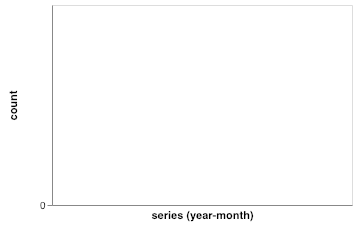

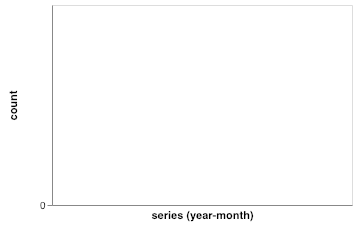

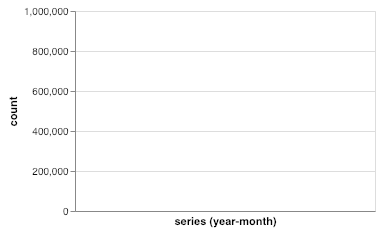

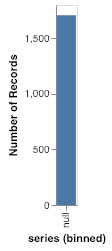

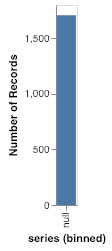

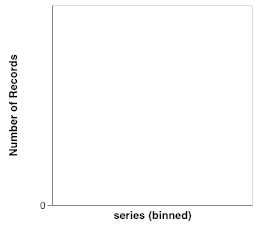

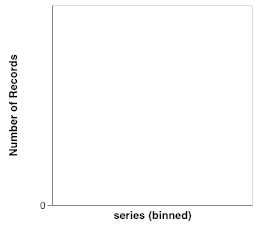

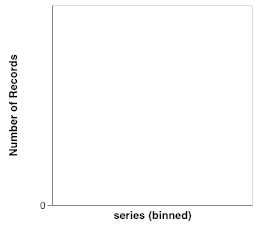

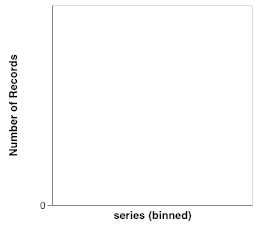

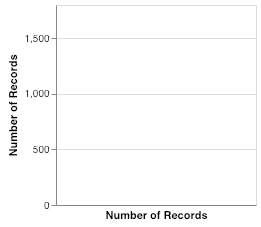

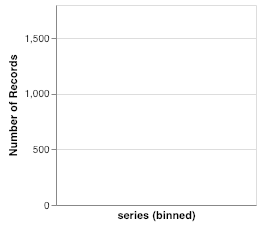

In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import json
import os
from pprint import pprint 

from vega import VegaLite

def prepare_spec(input_file):
    print(input_file)
    with open(input_file) as f:
        spec_dir = os.path.dirname(input_file)
        spec = json.load(f)
        pprint(spec)
        # add data directory to the spec to fix relative import
        if "url" in spec["data"]:
            spec["data"]["url"] = os.path.join(spec_dir, spec["data"]["url"])
            print(spec["data"]["url"])
        return VegaLite(spec)

# render all charts in the dir
def render_vegalite_dir(input_dir, max_display=10):
    for i, fname in enumerate(sorted(os.listdir(input_dir))):
        if fname.endswith(".vl.json"):
            print(fname)
            vl = prepare_spec(os.path.join(input_dir, fname))
            vl.display()
            if i > 10: break
    
# the input_file is relative to the notebook
#interact(render_vegalite_dir, input_dir="__temp__");

render_vegalite_dir("__temp__")